This program predict if the price a product is sold for is higher than the average price for the entire product category or not

the prediction is done using logistic regression and KNN

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('e-shop clothing 2008.csv', sep=';', )

df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [5]:
df.shape

(165474, 14)

In [6]:
dfNew = df.loc[(df["country"] == 43) | (df["country"] == 44) | (df["country"] == 45) | (df["country"] == 46) | (
        df["country"] == 46) | (df["country"] == 47)]
print(dfNew.shape)
df[df['country'] == '43-biz']

(3951, 14)


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page


In [7]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [8]:
# change some header name
df = df.rename(columns={
    "session ID": "session_ID",
    "page 1 (main category)": "category",
    "page 2 (clothing model)": "page_2",
    "model photography": "model_photography",
    "price 2": "is_higher_than_avg"
})

In [9]:
df = df.drop(["year", "page_2"], axis=1)

In [10]:
df.isna().sum()

month                 0
day                   0
order                 0
country               0
session_ID            0
category              0
colour                0
location              0
model_photography     0
price                 0
is_higher_than_avg    0
page                  0
dtype: int64

In [11]:
df['is_higher_than_avg'] = (df['is_higher_than_avg'] == 1).astype(int)

In [12]:
df['model_photography'] = (df['model_photography'] == 1).astype(int)

In [13]:
df.head()

,month,day,order,country,session_ID,category,colour,location,model_photography,price,is_higher_than_avg,page
0,4,1,1,29,1,1,1,5,1,28,0,1
1,4,1,2,29,1,1,1,6,1,33,0,1
2,4,1,3,29,1,2,10,2,1,52,1,1
3,4,1,4,29,1,2,6,6,0,38,0,1
4,4,1,5,29,1,2,4,3,0,52,1,1


In [14]:
df['page'].unique()

array([1, 4, 5, 2, 3])

In [15]:
# Create a figure
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(10, 6)


<Figure size 1000x600 with 0 Axes>

In [16]:
# remove the first one
df.corr()["is_higher_than_avg"].sort_values(ascending=False)[1:]
# df.corr()["price"].sort_values(ascending=False)[1:]

price                0.743633
category             0.137944
colour               0.080147
model_photography    0.072944
country              0.017536
month                0.014658
session_ID           0.012742
order               -0.000772
day                 -0.004254
page                -0.029984
location            -0.073187
Name: is_higher_than_avg, dtype: float64

<Axes: >

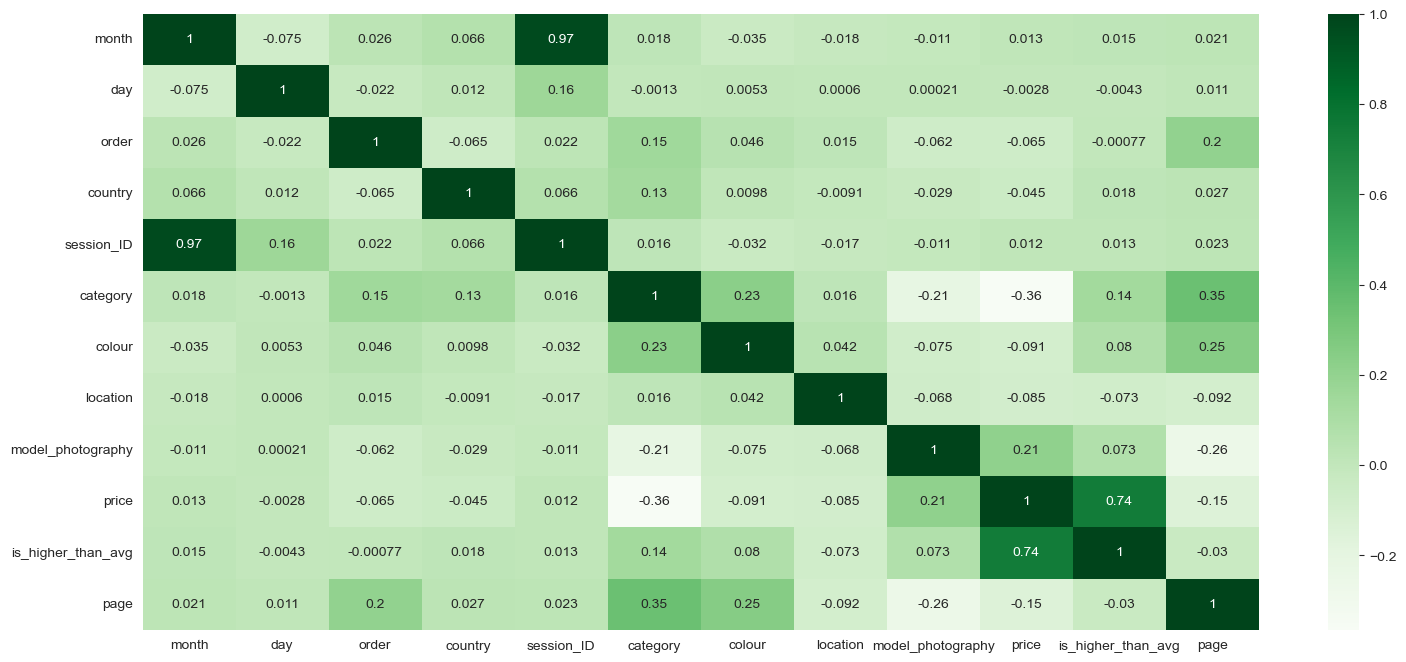

In [17]:
#Correlation Graph

plt.figure(figsize=(18, 8))

sn.heatmap(df.corr(), annot=True, cmap="Greens")

In [18]:
df.dtypes

month                 int64
day                   int64
order                 int64
country               int64
session_ID            int64
category              int64
colour                int64
location              int64
model_photography     int64
price                 int64
is_higher_than_avg    int64
page                  int64
dtype: object

In [19]:
# place is_higher_than_avg at the end of the data frame
is_higher_than_avg = df["is_higher_than_avg"]

df.drop("is_higher_than_avg", axis=1, inplace=True)

df["is_higher_than_avg"] = is_higher_than_avg

is_higher_than_avg

0         0
1         0
2         1
3         0
4         1
         ..
165469    1
165470    1
165471    0
165472    1
165473    1
Name: is_higher_than_avg, Length: 165474, dtype: int64

In [20]:
columns_name = df.columns
target = "price"

for label in columns_name:
    if label == target:
        continue

<Axes: ylabel='Frequency'>

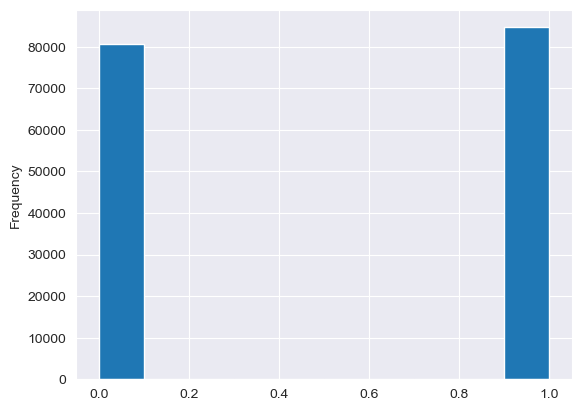

In [21]:
df['is_higher_than_avg'].plot.hist()

In [22]:
df_len = len(df)

train, test = np.split(df.sample(frac=1), [int(0.8 * df_len)])

print(df_len, len(train), len(test))

165474 132379 33095


In [23]:
# , show_standardize = False
def scale_dataset(data_frame):
    X = data_frame[data_frame.columns[:-1]].values  # these are the columns needed for the prediction
    y = data_frame[data_frame.columns[-1]].values  # this is the predicted column

    # if show_standardize:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [24]:
train, X_train, y_train = scale_dataset(train)
test, X_test, y_test = scale_dataset(test)

In [25]:
X_train.shape

(132379, 11)

In [26]:
X_test.shape

(33095, 11)

In [27]:
# import necessary libraries for KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
# Train
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# predict
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16102
           1       1.00      1.00      1.00     16993

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# train

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

# predict

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16102
           1       0.99      1.00      0.99     16993

    accuracy                           0.99     33095
   macro avg       0.99      0.99      0.99     33095
weighted avg       0.99      0.99      0.99     33095



In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


In [32]:
# train
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)

# predict
y_pred = lr_model.predict(X_train)
accuracy = r2_score(y_train, y_pred)

print(f'Accuracy of trained dataset is {accuracy}')

y_pred = lr_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)

print(f'Accuracy of test dataset is {accuracy}')

Accuracy of trained dataset is 0.7564331817259276
Accuracy of test dataset is 0.7544739232693973


In [33]:
# Evaluate Linear Regression with
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'The mean absolute error is {mae_lr}.')
print(f'The mean squared error is {mse_lr}.')
print(f'The root mean squared error is {rmse_lr}.')

The mean absolute error is 0.20909881923779944.
The mean squared error is 0.06133702858188322.
The root mean squared error is 0.24766313529042472.


In [34]:
rsqLinReg = (lr_model.score(X_train, y_train)).round(3)
print(f"coefficient of determination: {rsqLinReg}")

coefficient of determination: 0.756
